In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [2]:
### Import our data
inpath = "C:/Users/Davis/Downloads/scaledmagicdata2.csv"
df = pd.read_csv(inpath)

### Separate target and convert the data to a numpy array
Y = df.pop("Class")
X = np.array(df)


In [3]:
### split into train and test data, with ~1/3 of data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 11)

In [4]:
### Define loss function

### We use Binary Cross-entropy as our loss function. We set from_logits
### to "False" because although our model will return log probabilities by 
### default, we will wrap it in a sigmoid function to return probabilities
### instead. This ensures compatibility with our ROC AUC metric 
loss_fn = tf.keras.losses.BinaryCrossentropy(
    from_logits = False)

In [5]:
### Define model scoring metric 

### Simply accuracy doesn't help us here, so we use ROC AUC
aucward = tf.keras.metrics.AUC(curve = 'ROC')

In [6]:
### Now we're ready to start building our model. First let's check the shape
### of an element of X_train so we can tell our model the input shape
X_train[1].shape

(10,)

In [7]:
### We have everything we need. It is time to build a neural network

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = (10,)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

### Isn't it bonkers how easy that is? I mean, come on now

In [12]:
### We set a filepath to save our model 
fpath = 'C:/Users/Davis/Desktop/SIE 533/MagicNN.model'

### We set a checkpoint, this will save the model with the best AUC 
### as we go
######################### TO DO ############################
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = (9,)),
    tf.keras.layers.Dense(9, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

### BETTER:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = (10,)),
    tf.keras.layers.Dense(9, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])



In [13]:
### Let us compile our model, setting its loss and metric functions

model.compile(optimizer = 'SGD',
             loss = loss_fn,
             metrics = aucward)

In [14]:
### Here goes nothing
history = model.fit(
    x = X_train, y = y_train,
    epochs = 1000,
    validation_data = (X_test, y_test),
    verbose = True,
    shuffle = True)

Epoch 1/1000
399/399 [==============================] - 0s 970us/step - loss: 0.6653 - auc: 0.6963 - val_loss: 0.6479 - val_auc: 0.5808
Epoch 2/1000
399/399 [==============================] - 0s 651us/step - loss: 0.6465 - auc: 0.5931 - val_loss: 0.6401 - val_auc: 0.6474
Epoch 3/1000
399/399 [==============================] - 0s 637us/step - loss: 0.6399 - auc: 0.6720 - val_loss: 0.6312 - val_auc: 0.7010
Epoch 4/1000
399/399 [==============================] - 0s 645us/step - loss: 0.6254 - auc: 0.7212 - val_loss: 0.6087 - val_auc: 0.7454
Epoch 5/1000
399/399 [==============================] - 0s 649us/step - loss: 0.5946 - auc: 0.7524 - val_loss: 0.5696 - val_auc: 0.7687
Epoch 6/1000
399/399 [==============================] - 0s 682us/step - loss: 0.5555 - auc: 0.7705 - val_loss: 0.5343 - val_auc: 0.7832
Epoch 7/1000
399/399 [==============================] - 0s 662us/step - loss: 0.5296 - auc: 0.7839 - val_loss: 0.5148 - val_auc: 0.7957
Epoch 8/1000
399/399 [==========================

399/399 [==============================] - 0s 649us/step - loss: 0.3567 - auc: 0.9047 - val_loss: 0.3715 - val_auc: 0.9061
Epoch 60/1000
399/399 [==============================] - 0s 634us/step - loss: 0.3581 - auc: 0.9040 - val_loss: 0.3505 - val_auc: 0.9085
Epoch 61/1000
399/399 [==============================] - 0s 644us/step - loss: 0.3574 - auc: 0.9043 - val_loss: 0.3619 - val_auc: 0.9067
Epoch 62/1000
399/399 [==============================] - 0s 642us/step - loss: 0.3566 - auc: 0.9051 - val_loss: 0.3483 - val_auc: 0.9086
Epoch 63/1000
399/399 [==============================] - 0s 634us/step - loss: 0.3562 - auc: 0.9052 - val_loss: 0.3486 - val_auc: 0.9091
Epoch 64/1000
399/399 [==============================] - 0s 637us/step - loss: 0.3564 - auc: 0.9048 - val_loss: 0.3501 - val_auc: 0.9080
Epoch 65/1000
399/399 [==============================] - 0s 641us/step - loss: 0.3565 - auc: 0.9048 - val_loss: 0.3802 - val_auc: 0.9069
Epoch 66/1000
399/399 [==============================] 

Epoch 119/1000
399/399 [==============================] - 0s 632us/step - loss: 0.3452 - auc: 0.9110 - val_loss: 0.3496 - val_auc: 0.9126
Epoch 120/1000
399/399 [==============================] - 0s 659us/step - loss: 0.3448 - auc: 0.9108 - val_loss: 0.3444 - val_auc: 0.9134
Epoch 121/1000
399/399 [==============================] - 0s 638us/step - loss: 0.3449 - auc: 0.9107 - val_loss: 0.3381 - val_auc: 0.9141
Epoch 122/1000
399/399 [==============================] - 0s 636us/step - loss: 0.3452 - auc: 0.9109 - val_loss: 0.3660 - val_auc: 0.9113
Epoch 123/1000
399/399 [==============================] - 0s 634us/step - loss: 0.3443 - auc: 0.9109 - val_loss: 0.3389 - val_auc: 0.9140
Epoch 124/1000
399/399 [==============================] - 0s 638us/step - loss: 0.3443 - auc: 0.9113 - val_loss: 0.3349 - val_auc: 0.9147
Epoch 125/1000
399/399 [==============================] - 0s 636us/step - loss: 0.3445 - auc: 0.9113 - val_loss: 0.3366 - val_auc: 0.9148
Epoch 126/1000
399/399 [==========

399/399 [==============================] - 0s 646us/step - loss: 0.3281 - auc: 0.9193 - val_loss: 0.3291 - val_auc: 0.9217
Epoch 238/1000
399/399 [==============================] - 0s 647us/step - loss: 0.3287 - auc: 0.9193 - val_loss: 0.4072 - val_auc: 0.9164
Epoch 239/1000
399/399 [==============================] - 0s 641us/step - loss: 0.3288 - auc: 0.9191 - val_loss: 0.3492 - val_auc: 0.9193
Epoch 240/1000
399/399 [==============================] - 0s 645us/step - loss: 0.3282 - auc: 0.9196 - val_loss: 0.3216 - val_auc: 0.9219
Epoch 241/1000
399/399 [==============================] - 0s 656us/step - loss: 0.3282 - auc: 0.9195 - val_loss: 0.3249 - val_auc: 0.9215
Epoch 242/1000
399/399 [==============================] - 0s 666us/step - loss: 0.3281 - auc: 0.9196 - val_loss: 0.3198 - val_auc: 0.9220
Epoch 243/1000
399/399 [==============================] - 0s 642us/step - loss: 0.3278 - auc: 0.9192 - val_loss: 0.3292 - val_auc: 0.9206
Epoch 244/1000
399/399 [=========================

399/399 [==============================] - 0s 647us/step - loss: 0.3162 - auc: 0.9249 - val_loss: 0.3138 - val_auc: 0.9238
Epoch 356/1000
399/399 [==============================] - 0s 640us/step - loss: 0.3160 - auc: 0.9248 - val_loss: 0.3217 - val_auc: 0.9248
Epoch 357/1000
399/399 [==============================] - 0s 661us/step - loss: 0.3158 - auc: 0.9252 - val_loss: 0.3165 - val_auc: 0.9230
Epoch 358/1000
399/399 [==============================] - 0s 663us/step - loss: 0.3157 - auc: 0.9250 - val_loss: 0.3305 - val_auc: 0.9229
Epoch 359/1000
399/399 [==============================] - 0s 649us/step - loss: 0.3162 - auc: 0.9250 - val_loss: 0.3135 - val_auc: 0.9244
Epoch 360/1000
399/399 [==============================] - 0s 655us/step - loss: 0.3156 - auc: 0.9250 - val_loss: 0.3138 - val_auc: 0.9247
Epoch 361/1000
399/399 [==============================] - 0s 652us/step - loss: 0.3161 - auc: 0.9248 - val_loss: 0.3576 - val_auc: 0.9221
Epoch 362/1000
399/399 [=========================

399/399 [==============================] - 0s 658us/step - loss: 0.3082 - auc: 0.9283 - val_loss: 0.3198 - val_auc: 0.9254
Epoch 474/1000
399/399 [==============================] - 0s 650us/step - loss: 0.3074 - auc: 0.9288 - val_loss: 0.3274 - val_auc: 0.9241
Epoch 475/1000
399/399 [==============================] - 0s 664us/step - loss: 0.3082 - auc: 0.9286 - val_loss: 0.3129 - val_auc: 0.9249
Epoch 476/1000
399/399 [==============================] - 0s 633us/step - loss: 0.3076 - auc: 0.9286 - val_loss: 0.3119 - val_auc: 0.9257
Epoch 477/1000
399/399 [==============================] - 0s 639us/step - loss: 0.3078 - auc: 0.9287 - val_loss: 0.3121 - val_auc: 0.9250
Epoch 478/1000
399/399 [==============================] - 0s 632us/step - loss: 0.3074 - auc: 0.9288 - val_loss: 0.3123 - val_auc: 0.9253
Epoch 479/1000
399/399 [==============================] - 0s 643us/step - loss: 0.3061 - auc: 0.9298 - val_loss: 0.3192 - val_auc: 0.9241
Epoch 480/1000
399/399 [=========================

399/399 [==============================] - 0s 661us/step - loss: 0.3048 - auc: 0.9298 - val_loss: 0.3205 - val_auc: 0.9242
Epoch 592/1000
399/399 [==============================] - 0s 641us/step - loss: 0.3042 - auc: 0.9303 - val_loss: 0.3108 - val_auc: 0.9264
Epoch 593/1000
399/399 [==============================] - 0s 624us/step - loss: 0.3043 - auc: 0.9300 - val_loss: 0.3157 - val_auc: 0.9247
Epoch 594/1000
399/399 [==============================] - 0s 638us/step - loss: 0.3034 - auc: 0.9303 - val_loss: 0.3117 - val_auc: 0.9249
Epoch 595/1000
399/399 [==============================] - 0s 649us/step - loss: 0.3034 - auc: 0.9308 - val_loss: 0.3142 - val_auc: 0.9245
Epoch 596/1000
399/399 [==============================] - 0s 653us/step - loss: 0.3028 - auc: 0.9307 - val_loss: 0.3233 - val_auc: 0.9248
Epoch 597/1000
399/399 [==============================] - 0s 666us/step - loss: 0.3038 - auc: 0.9302 - val_loss: 0.3147 - val_auc: 0.9234
Epoch 598/1000
399/399 [=========================

399/399 [==============================] - 0s 646us/step - loss: 0.3021 - auc: 0.9311 - val_loss: 0.3140 - val_auc: 0.9259
Epoch 710/1000
399/399 [==============================] - 0s 652us/step - loss: 0.3016 - auc: 0.9316 - val_loss: 0.3402 - val_auc: 0.9210
Epoch 711/1000
399/399 [==============================] - 0s 662us/step - loss: 0.3010 - auc: 0.9324 - val_loss: 0.3096 - val_auc: 0.9264
Epoch 712/1000
399/399 [==============================] - 0s 644us/step - loss: 0.3021 - auc: 0.9316 - val_loss: 0.3222 - val_auc: 0.9247
Epoch 713/1000
399/399 [==============================] - 0s 629us/step - loss: 0.3017 - auc: 0.9314 - val_loss: 0.3108 - val_auc: 0.9257
Epoch 714/1000
399/399 [==============================] - 0s 639us/step - loss: 0.3018 - auc: 0.9314 - val_loss: 0.3135 - val_auc: 0.9246
Epoch 715/1000
399/399 [==============================] - 0s 634us/step - loss: 0.3017 - auc: 0.9315 - val_loss: 0.3263 - val_auc: 0.9238
Epoch 716/1000
399/399 [=========================

399/399 [==============================] - 0s 669us/step - loss: 0.2994 - auc: 0.9325 - val_loss: 0.3108 - val_auc: 0.9264
Epoch 828/1000
399/399 [==============================] - 0s 632us/step - loss: 0.3006 - auc: 0.9320 - val_loss: 0.3128 - val_auc: 0.9266
Epoch 829/1000
399/399 [==============================] - 0s 639us/step - loss: 0.2993 - auc: 0.9326 - val_loss: 0.3277 - val_auc: 0.9243
Epoch 830/1000
399/399 [==============================] - 0s 634us/step - loss: 0.3003 - auc: 0.9316 - val_loss: 0.3273 - val_auc: 0.9260
Epoch 831/1000
399/399 [==============================] - 0s 619us/step - loss: 0.3005 - auc: 0.9317 - val_loss: 0.4354 - val_auc: 0.9058
Epoch 832/1000
399/399 [==============================] - 0s 646us/step - loss: 0.3002 - auc: 0.9317 - val_loss: 0.3115 - val_auc: 0.9261
Epoch 833/1000
399/399 [==============================] - 0s 640us/step - loss: 0.2989 - auc: 0.9326 - val_loss: 0.3128 - val_auc: 0.9262
Epoch 834/1000
399/399 [=========================

399/399 [==============================] - 0s 627us/step - loss: 0.2986 - auc: 0.9326 - val_loss: 0.3080 - val_auc: 0.9273
Epoch 946/1000
399/399 [==============================] - 0s 634us/step - loss: 0.2971 - auc: 0.9334 - val_loss: 0.3105 - val_auc: 0.9259
Epoch 947/1000
399/399 [==============================] - 0s 624us/step - loss: 0.2978 - auc: 0.9329 - val_loss: 0.3119 - val_auc: 0.9265
Epoch 948/1000
399/399 [==============================] - 0s 639us/step - loss: 0.2981 - auc: 0.9330 - val_loss: 0.3138 - val_auc: 0.9246
Epoch 949/1000
399/399 [==============================] - 0s 637us/step - loss: 0.2973 - auc: 0.9337 - val_loss: 0.3085 - val_auc: 0.9268
Epoch 950/1000
399/399 [==============================] - 0s 652us/step - loss: 0.2977 - auc: 0.9331 - val_loss: 0.3160 - val_auc: 0.9259
Epoch 951/1000
399/399 [==============================] - 0s 645us/step - loss: 0.2980 - auc: 0.9331 - val_loss: 0.3172 - val_auc: 0.9258
Epoch 952/1000
399/399 [=========================

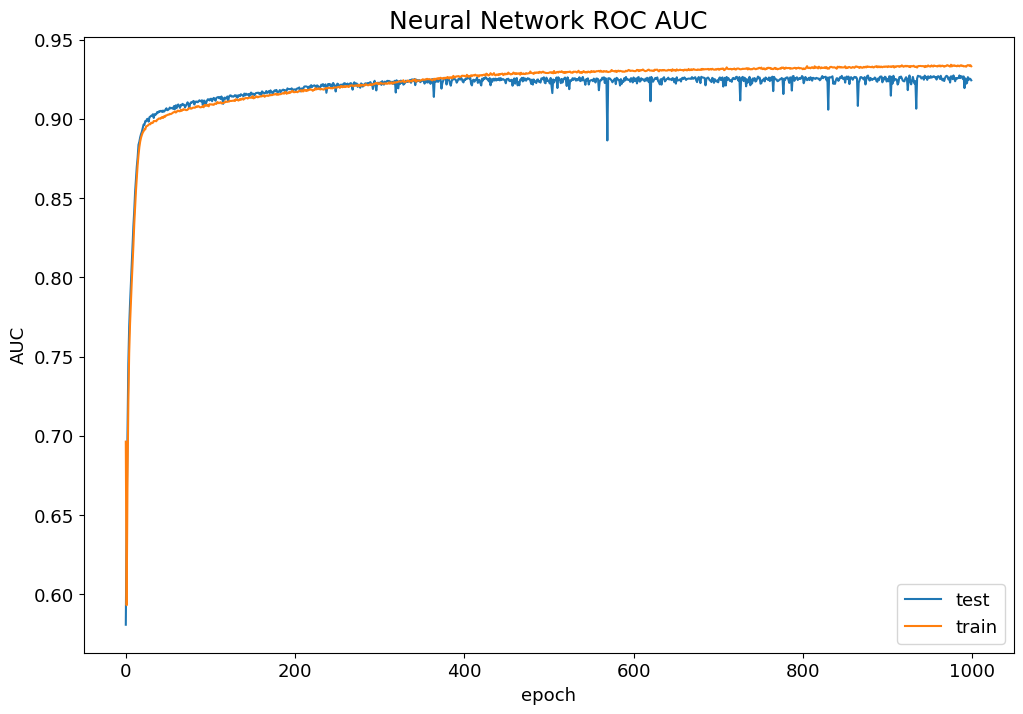

In [38]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (12, 8))
plt.plot(history.history['val_auc'])
plt.plot(history.history['auc'])
plt.title('Neural Network ROC AUC', fontsize = 18)
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['test', 'train'])
plt.savefig('C:/Users/Davis/Desktop/NNROCAUC.png')
plt.show()